In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wsh10\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\wsh10\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wsh10\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wsh10\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [2]:
file_path = r"C:\research_dataset\prediction_data\energy_consumption_prediction\final_data\final_data.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,time,usage,STN_ID,TM,LAT,LON,HT,WD,WS,TA,...,PA,PS,RN_YN,RN_1HR,RN_DAY,RN_15M,RN_60M,WD_INS,WS_INS,unknown
0,01/08/2014 00:15,454.56,406.0,2.010000e+11,37.6661,127.0295,55.5,2764.0,2.0,230.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,2616.0,4.0,=
1,01/08/2014 00:30,440.88,406.0,2.010000e+11,37.6661,127.0295,55.5,3173.0,9.0,228.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3150.0,10.0,=
2,01/08/2014 00:45,438.00,406.0,2.010000e+11,37.6661,127.0295,55.5,54.0,1.0,228.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3431.0,2.0,=
3,01/08/2014 01:00,447.84,406.0,2.010000e+11,37.6661,127.0295,55.5,3426.0,1.0,227.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3375.0,4.0,=
4,01/08/2014 01:15,459.36,406.0,2.010000e+11,37.6661,127.0295,55.5,3312.0,0.0,229.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3291.0,1.0,=
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/07/2015 23:00,490.56,406.0,2.020000e+11,37.6661,127.0295,55.5,3023.0,0.0,246.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,3206.0,2.0,=
35036,31/07/2015 23:15,486.00,406.0,2.020000e+11,37.6661,127.0295,55.5,3270.0,0.0,244.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,2813.0,2.0,=
35037,31/07/2015 23:30,491.52,406.0,2.020000e+11,37.6661,127.0295,55.5,98.0,1.0,244.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,1716.0,2.0,=
35038,31/07/2015 23:45,480.24,406.0,2.020000e+11,37.6661,127.0295,55.5,2639.0,0.0,248.0,...,0.0,-998.0,0.0,0.0,0.0,0.0,0.0,2784.0,10.0,=


In [9]:
df = df[['usage', 'WS', 'TA', 'HM']]

In [10]:
df

,usage,WS,TA,HM
0,454.56,2.0,230.0,999.0
1,440.88,9.0,228.0,999.0
2,438.00,1.0,228.0,999.0
3,447.84,1.0,227.0,999.0
4,459.36,0.0,229.0,999.0
...,...,...,...,...
35035,490.56,0.0,246.0,895.0
35036,486.00,0.0,244.0,906.0
35037,491.52,1.0,244.0,912.0
35038,480.24,0.0,248.0,905.0


In [11]:
x_train = df[['WS', 'TA', 'HM']][0:2000]
y_train = df['usage'][0:2000]

In [12]:
x_val = df[['WS', 'TA', 'HM']][2000:2500]
y_val = df['usage'][2000:2500]

In [13]:
x_test = df[['WS', 'TA', 'HM']][2500:3000]
y_test = df['usage'][2500:3000]

In [30]:
# 이전까지한 이미지 데이터의 경우, np.array로 바꿔줘야하나, pandas는 numpy기반이기 때문에, 굳이 안해줘도 됨.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [14]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(3, activation="linear", input_shape=(x_size,)))            
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(lr=1e-3, decay=0.0),
        metrics=['accuracy'])
    return(t_model)

In [15]:
model = deep_learning_model_1(x_train.shape[1], 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
epochs = 10
batch_size = 10

print('Epochs: ', epochs)
print('Batch_size: ', batch_size)

Epochs:  10
Batch_size:  10


In [13]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, validation_data = (x_val, y_val))

Train on 2000 samples, validate on 500 samples
Epoch 1/10
2000/2000 [==============================] - 1s 287us/step - loss: 342982.1526 - acc: 0.0000e+00 - val_loss: 340362.1223 - val_acc: 0.0000e+00
Epoch 2/10
2000/2000 [==============================] - 0s 95us/step - loss: 342703.1592 - acc: 0.0000e+00 - val_loss: 340114.4581 - val_acc: 0.0000e+00
Epoch 3/10
2000/2000 [==============================] - 0s 86us/step - loss: 342471.3237 - acc: 0.0000e+00 - val_loss: 339897.7277 - val_acc: 0.0000e+00
Epoch 4/10
2000/2000 [==============================] - 0s 90us/step - loss: 342244.7129 - acc: 0.0000e+00 - val_loss: 339631.4273 - val_acc: 0.0000e+00
Epoch 5/10
2000/2000 [==============================] - 0s 82us/step - loss: 342008.9805 - acc: 0.0000e+00 - val_loss: 339464.3359 - val_acc: 0.0000e+00
Epoch 6/10
2000/2000 [==============================] - 0s 82us/step - loss: 341795.2073 - acc: 0.0000e+00 - val_loss: 339225.1573 - val_acc: 0.0000e+00
Epoch 7/10
2000/2000 [============

In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

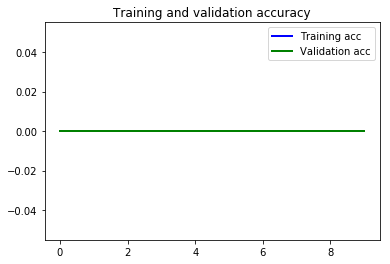

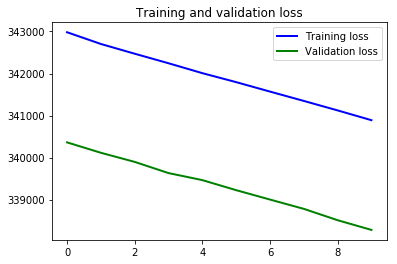

In [16]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()